In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import pyclustertend 
import sklearn.preprocessing
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import sklearn.cluster as cluster
import random

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from kmodes.kprototypes import KPrototypes
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kneed import KneeLocator
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

from tqdm import tqdm
import sys
import warnings

In [3]:
songs_df = pd.read_csv('songs.csv')

songs_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
songs_df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [5]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
# Identificamos variables categoricas y numericas
categorical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ["object", "bool"]]
categorical_cols.append('mode')
print("Variables categoricas: ",categorical_cols)
print("Cantidad: ", len(categorical_cols))

Variables categoricas:  ['artist', 'song', 'explicit', 'genre', 'mode']
Cantidad:  5


In [7]:
numerical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('mode')
print("Variables numericas: ",numerical_cols)
print("Cantidad: ", len(numerical_cols))

Variables numericas:  ['duration_ms', 'year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Cantidad:  13


Resumen estadístico de variables numéricas:
         duration_ms        year   popularity  danceability       energy  \
count    2000.000000  2000.00000  2000.000000   2000.000000  2000.000000   
mean   228748.124500  2009.49400    59.872500      0.667438     0.720366   
std     39136.569008     5.85996    21.335577      0.140416     0.152745   
min    113000.000000  1998.00000     0.000000      0.129000     0.054900   
25%    203580.000000  2004.00000    56.000000      0.581000     0.622000   
50%    223279.500000  2010.00000    65.500000      0.676000     0.736000   
75%    248133.000000  2015.00000    73.000000      0.764000     0.839000   
max    484146.000000  2020.00000    89.000000      0.975000     0.999000   

               key     loudness         mode  speechiness  acousticness  \
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean      5.378000    -5.512434     0.553500     0.103568      0.128955   
std       3.615059     1.933482     0.497254  

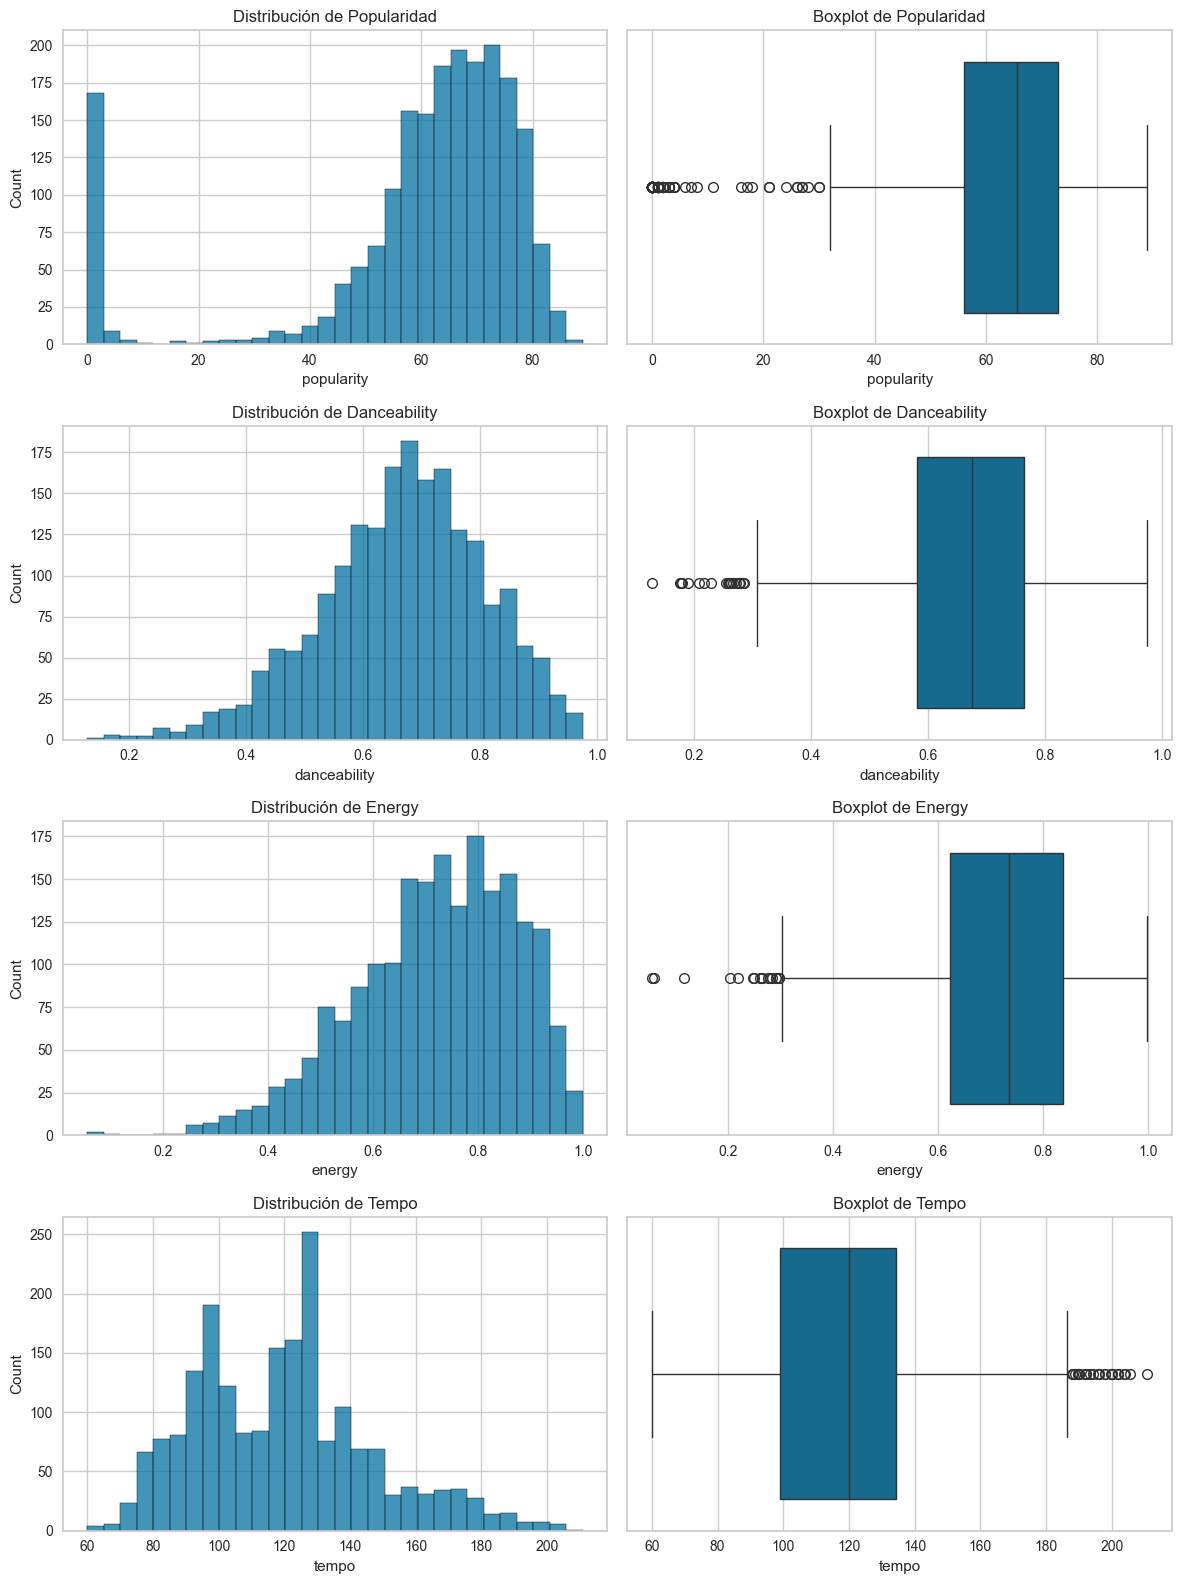

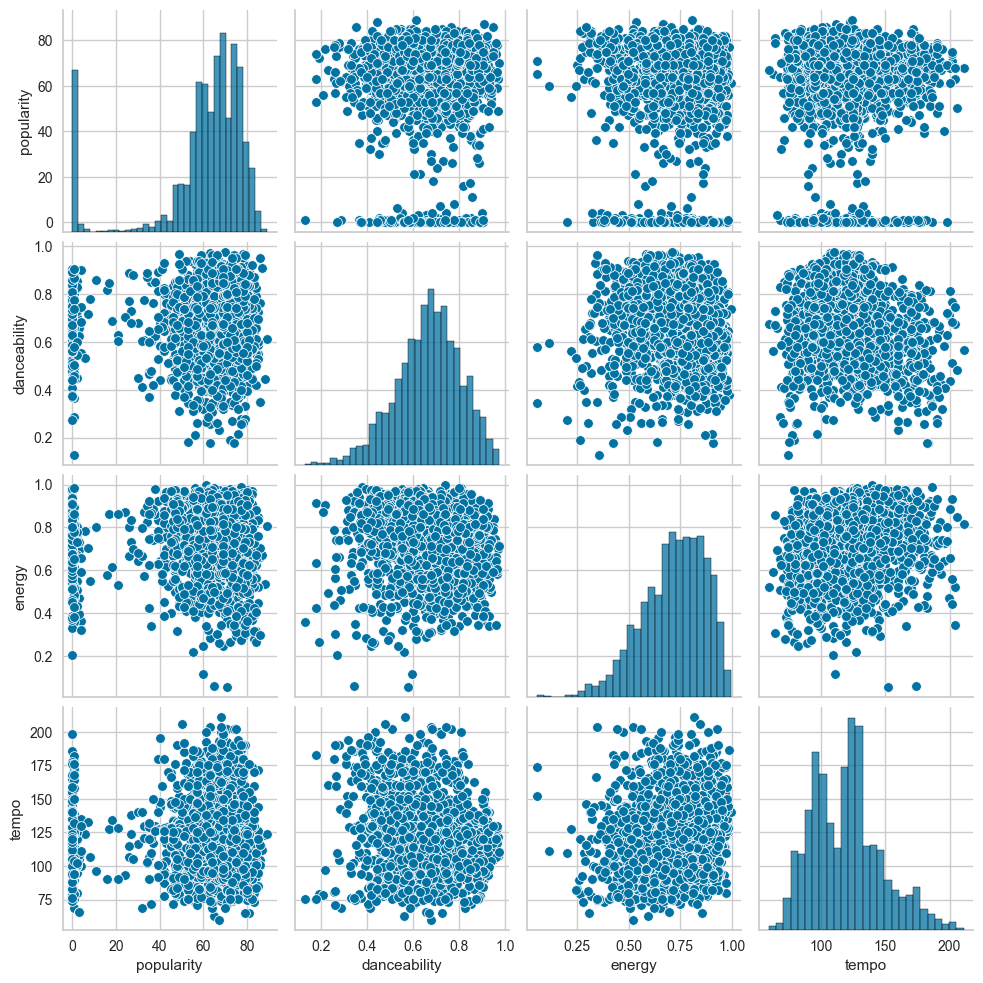

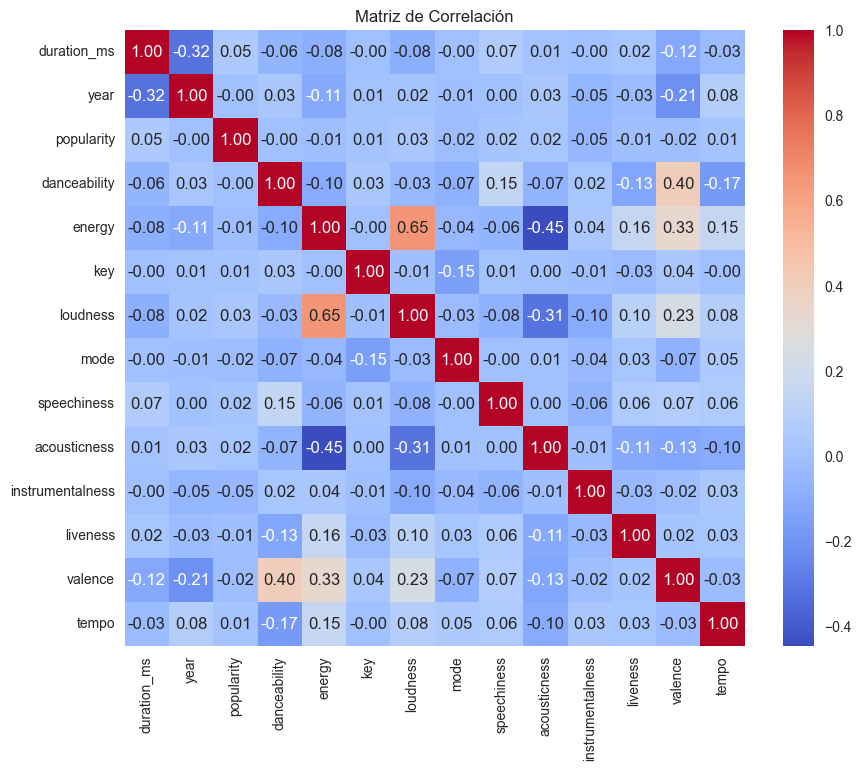

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


songs_df = pd.read_csv('songs.csv')


categorical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype == "object"]
numerical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ['int64', 'float64']]

# Resumen estadístico de las variables numéricas
print("Resumen estadístico de variables numéricas:")
print(songs_df[numerical_cols].describe())

# Resumen de variables categóricas
print("\nResumen de variables categóricas:")
print(songs_df[categorical_cols].describe())

# Visualización de la distribución de  variables numéricas
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Histograms
sns.histplot(songs_df['popularity'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Popularidad')
sns.histplot(songs_df['danceability'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Danceability')
sns.histplot(songs_df['energy'], bins=30, ax=axes[2, 0])
axes[2, 0].set_title('Distribución de Energy')
sns.histplot(songs_df['tempo'], bins=30, ax=axes[3, 0])
axes[3, 0].set_title('Distribución de Tempo')

# Boxplots
sns.boxplot(x=songs_df['popularity'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Popularidad')
sns.boxplot(x=songs_df['danceability'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Danceability')
sns.boxplot(x=songs_df['energy'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot de Energy')
sns.boxplot(x=songs_df['tempo'], ax=axes[3, 1])
axes[3, 1].set_title('Boxplot de Tempo')

plt.tight_layout()
plt.show()

sns.pairplot(songs_df[['popularity', 'danceability', 'energy', 'tempo']])
plt.show()

# Análisis de correlación
correlation_matrix = songs_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



Distribución de Popularidad: Este histograma muestra cómo se distribuye la popularidad de las canciones en el conjunto de datos. Se puede observar que la mayoría de las canciones tienen una popularidad entre 40 y 80, con un pico aparente alrededor del rango de 60 a 70. Hay muy pocas canciones con una popularidad inferior a 20 o superior a 80.

Distribución de Danceability: La medida de la aptitud para bailar de las canciones parece tener una distribución más o menos simétrica y concentrada alrededor del valor medio, con la mayoría de las canciones situadas entre 0.4 y 0.8. Esto sugiere que la mayoría de las canciones en el conjunto de datos están diseñadas para ser bastante bailables.

Distribución de Energy: La energía de las canciones varía ampliamente, con una distribución multimodal (varios picos). Esto podría indicar la presencia de diferentes tipos de canciones en el conjunto de datos, algunas más energéticas que otras. Hay picos significativos alrededor de valores bajos, medios y altos de energía.

Distribución de Tempo: El tempo, o velocidad, de las canciones también muestra una distribución multimodal, con picos principales alrededor de 80, 120 y 140 pulsos por minuto (BPM). Estos picos podrían representar diferentes géneros o estilos musicales que tienden a tener tempos característicos.

Histogramas (diagonal principal)

Popularidad: Muestra una distribución con un pico pronunciado, indicando una concentración de canciones con una popularidad en un rango específico.
Danceability: La mayoría de las canciones tienen una danceability media-alta, lo que sugiere una tendencia hacia canciones más bailables.
Energy: Presenta una distribución bastante uniforme con múltiples picos, lo que indica la presencia de canciones con variados niveles de energía.
Tempo: Tiene una distribución multimodal con picos alrededor de tempos específicos, probablemente reflejando diferentes estilos musicales que favorecen ciertos tempos.
Diagramas de dispersión (fuera de la diagonal principal)

Popularidad vs. Danceability: No parece haber una correlación clara; la popularidad no está consistentemente relacionada con la danceability.
Popularidad vs. Energy: Similar al anterior, no hay una relación directa aparente.
Popularidad vs. Tempo: No hay una tendencia clara que sugiera que el tempo afecte directamente la popularidad.
Danceability vs. Energy: Las canciones altamente bailables parecen tener tanto alta como baja energía, lo que sugiere que las canciones bailables no se limitan a un solo nivel de energía.
Danceability vs. Tempo: Hay una ligera concentración de canciones con alta danceability en tempos medios, pero no hay una correlación fuerte.
Energy vs. Tempo: No se observa una relación clara; canciones con diferentes niveles de energía pueden tener cualquier tempo.

loudness y energy tienen una correlación positiva moderada (alrededor de 0.65), lo que sugiere que canciones con mayor energía tienden a ser más sonoras.
acousticness y energy tienen una correlación negativa moderada (alrededor de -0.45), lo que sugiere que las canciones que son más acústicas tienden a tener menos energía.
danceability y valence tienen una correlación positiva moderada (alrededor de 0.40), lo que puede indicar que las canciones que son más bailables tienden a tener un tono más positivo.
duration_ms y year tienen una correlación negativa débil (alrededor de -0.32), indicando que quizás las canciones más recientes tienden a ser más cortas, aunque la relación no es muy fuerte.

# PREGUNTAS GENERADAS A PARTIR DEL ANÁLISIS


¿Cómo afecta el nivel de energía de una canción a su sonoridad? ¿Es posible que canciones con mayor energía sean sistemáticamente más sonoras debido a la producción musical?

Dado que la acousticness tiene una correlación negativa con la energía, ¿podría esto indicar que las canciones acústicas tienden a ser más tranquilas y suaves?

¿Existe una tendencia en la industria musical hacia producir canciones de menor duración en años recientes, como podría sugerir la correlación negativa entre duration_ms y year?

¿La danceability y la valence (positividad musical) de una canción tienen un efecto combinado en su popularidad, considerando que ambas parecen estar relacionadas moderadamente?

¿Podría la correlación entre danceability y valence ser explotada por productores para crear canciones que induzcan a un estado de ánimo más positivo y sean más propensas a ser populares?

¿Las canciones con alto nivel de speechiness tienden a ser menos bailables o tener energía más baja? ¿O hay géneros específicos donde estas características coexisten?

¿La presencia de instrumentales en una canción (instrumentalness) afecta alguna otra característica musical como la danceability o la energía?

¿Cómo podrían las disqueras utilizar la información de correlación entre loudness y energy para ajustar sus técnicas de masterización y mezcla en la producción musical?

¿Los cambios en el tempo afectan la percepción de energía en una canción, o son estas características independientes entre sí?

¿Puede el tempo o el ritmo de una canción predecir su popularidad, o estas cualidades son menos importantes que otros factores como el marketing o la presencia en redes sociales?

In [9]:
# ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = np.array(songs_df[['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']])

Verificamos si es factible hacer agrupamiento de los datos utilizando el estadístico de hopkins, lo que buscamos es que el número resultante no sea igual a 0.5.

In [10]:
#Estadistica de Hokpins
def hopkins_statistic(X): 
  sample = scale(X)
  n,d = X.shape
  m = int(0.1 * n) # 10% de la muestra
  neighbours = NearestNeighbors(n_neighbors=1).fit(X)
  rand_sample = np.random.random_sample(size=(m, d)) * (sample.max(axis=0) - sample.min(axis=0)) + sample.min(axis=0)
    
  u_dist, _ = neighbours.kneighbors(rand_sample, return_distance=True)
  u_dist_sum = np.sum(u_dist)
    
  w_dist, _ = neighbours.kneighbors(sample[np.random.choice(n, m, replace=False), :], return_distance=True)
  w_dist_sum = np.sum(w_dist)
    
  H = u_dist_sum / (u_dist_sum + w_dist_sum)
  return H

print(hopkins_statistic(X))

0.7660594303043189


Como podemos ver el resultado se encuentra alejado de 0.5, por lo que podemos continuar con los datos que tenemos

In [11]:
random.seed(123)
X_scale=sklearn.preprocessing.scale(X)

Utilizamos la métrica de la gráfica VAT para saber como están distribuidos nuestros datos, esto también nos puede dar una idea de los grupos que se pueden formar a partir de los campos que seleccionamos.

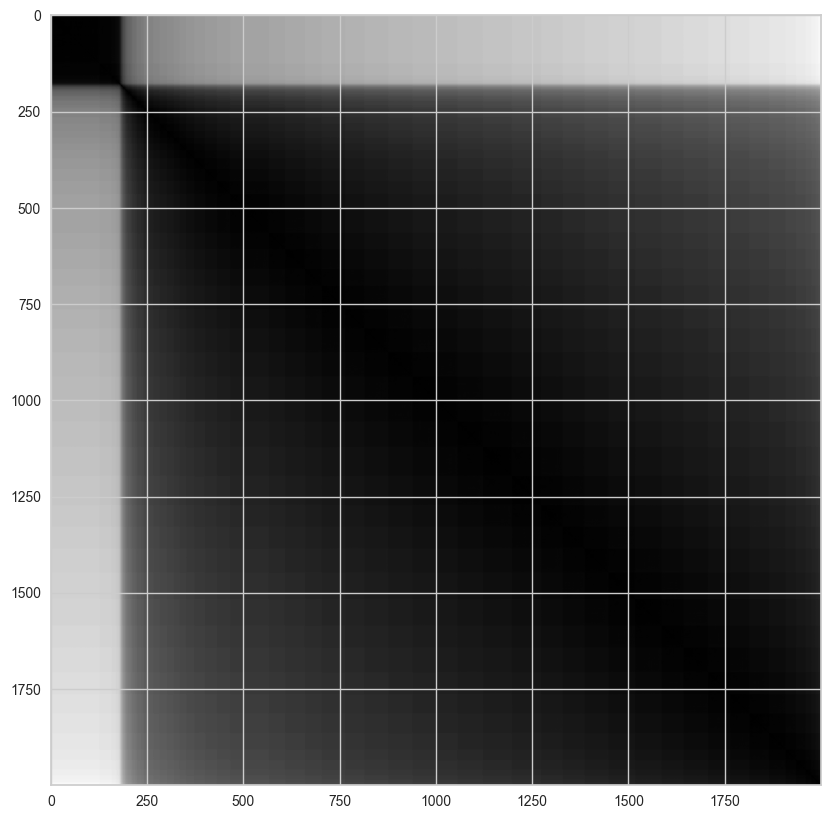

In [12]:
pyclustertend.vat(X)

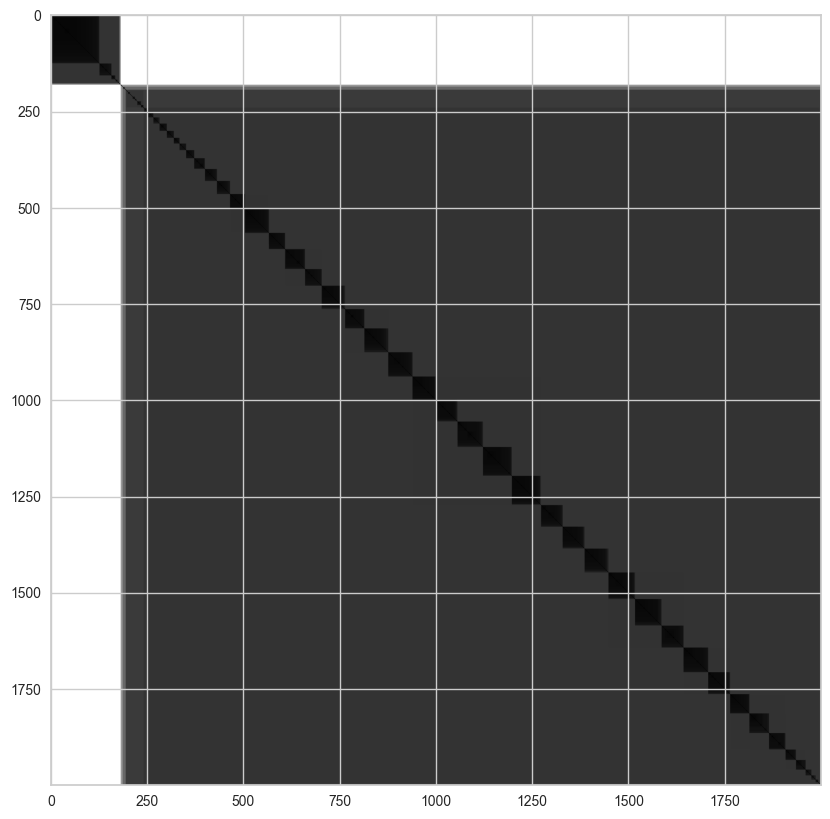

In [13]:
pyclustertend.ivat(X)

Ya visto que nuestros datos si pueden estar agrupados, buscamos en cuantos clusters o grupos podemos agrupar nuestros datos con una gráfica de codo

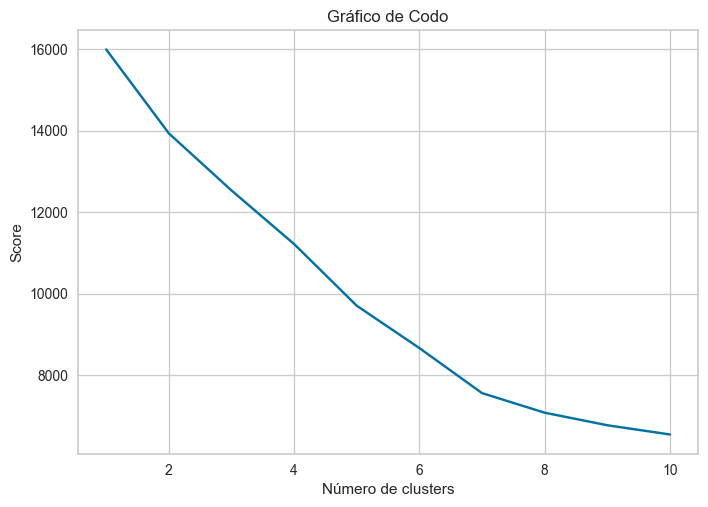

In [14]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

Como podemos ver, nuestra gráfica no nos da un número muy claro de cuantos grupos realizar el agrupamiento.

Por lo que podemos usar otro tipo de gráfica que nos pueda determinar con mayor precisión en cuantos grupos deberíamos de dividir y realizar nuestro agrupamiento

  0%|          | 0/3 [00:00<?, ?it/s]

Elbow Score Plot (distortion metric):
elbow value = optimal k: 4  | elbow score: 38,817.471


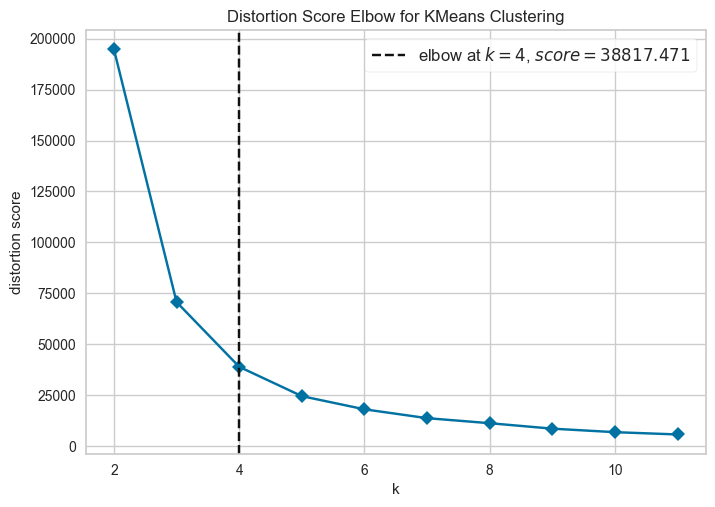

 33%|███▎      | 1/3 [00:00<00:01,  1.66it/s]

Elbow Score Plot (silhouette metric):
elbow value = optimal k: 2  | elbow score: 0.812


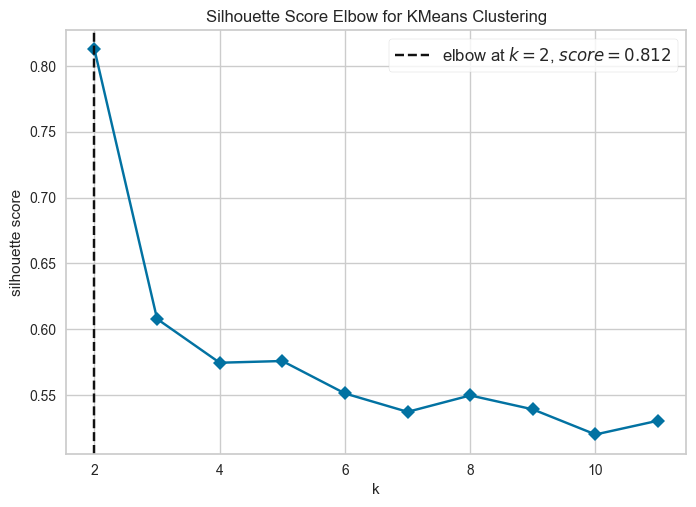

 67%|██████▋   | 2/3 [00:01<00:00,  1.16it/s]

Elbow Score Plot (calinski_harabasz metric):
elbow value = optimal k: 5  | elbow score: 18,096.720


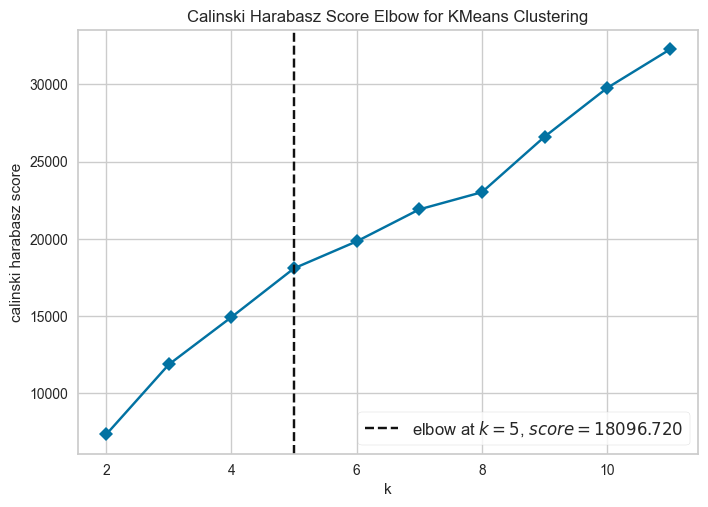

100%|██████████| 3/3 [00:01<00:00,  1.53it/s]


In [15]:
warnings.filterwarnings("ignore")
# elbow score plot with Yellowbrick
nK = 12    
RNDN = 42    
def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2,nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  

model = KMeans(random_state=RNDN)
_ = [elbowplot(X, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]  

Podemos ver que, según los gráficos, los grupos más recomendados son 2, 4 y 5. Aunque, por los gráficos VAT, podemos ver que 2 proyecta a ser la mejor cantidad para realizar agrupamiento.

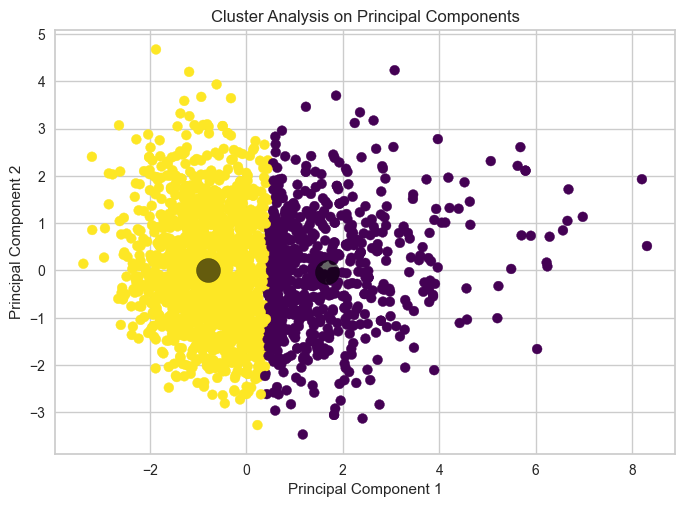

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Estandarización de las características
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
x = songs_df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# KMeans para el análisis de clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Analysis on Principal Components')
plt.show()

Como podemos ver, el gráfico de dendograma nos muestra que si existen dos grupos a la hora de hacer los agrupamientos, que fue el número que más vimos durante las gráficas de los datos.

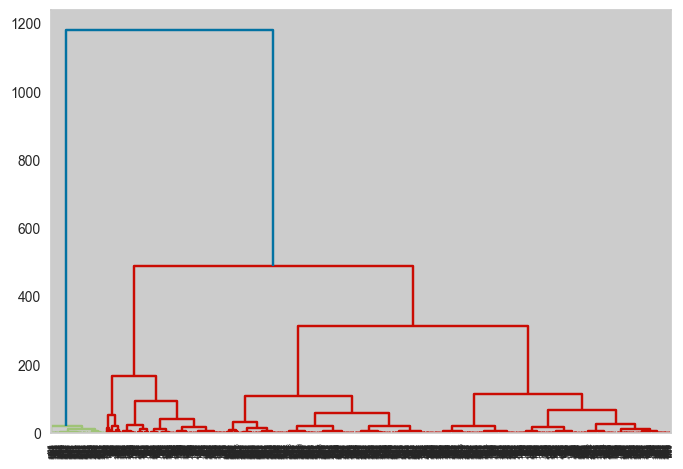

In [17]:
dendograma = sch.dendrogram(sch.linkage(X, method='ward'))

For n_clusters = 2 The average silhouette_score is : 0.8124769948538231
For n_clusters = 3 The average silhouette_score is : 0.607849900038719
For n_clusters = 4 The average silhouette_score is : 0.5720582746833985
For n_clusters = 5 The average silhouette_score is : 0.5607111902608235
For n_clusters = 6 The average silhouette_score is : 0.5549173869485491


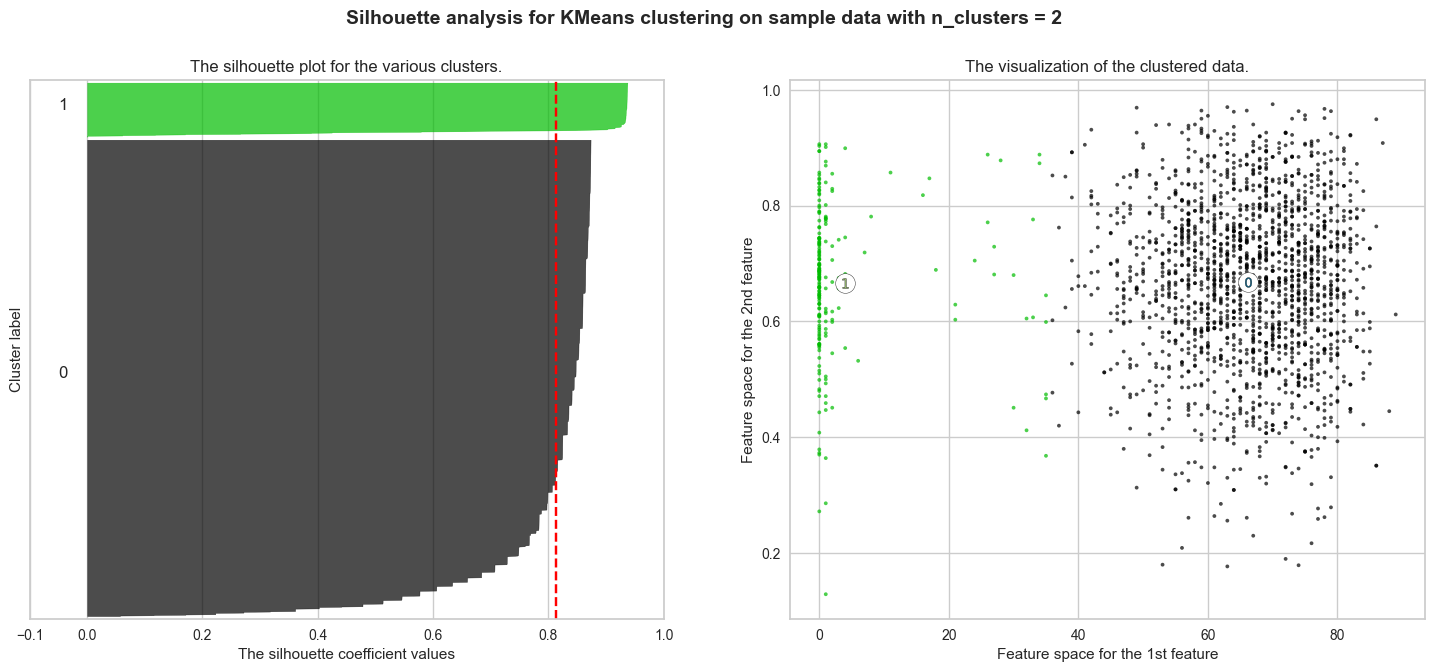

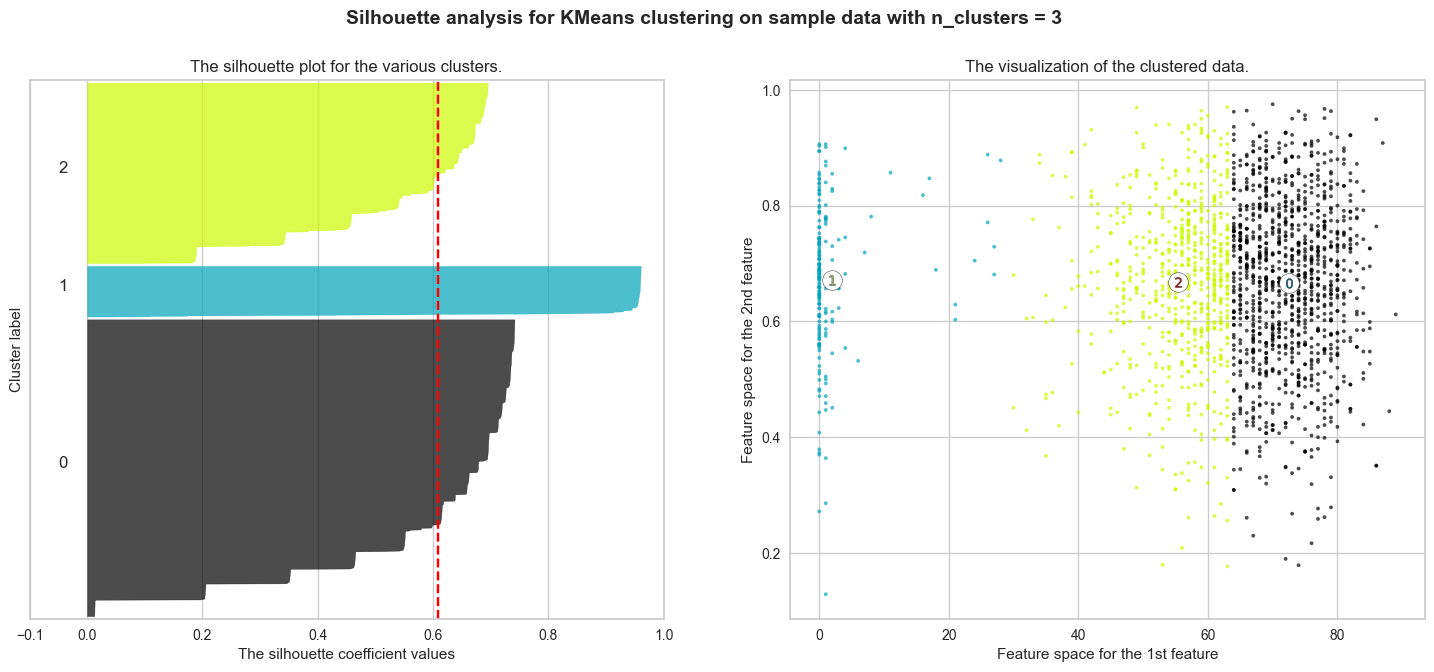

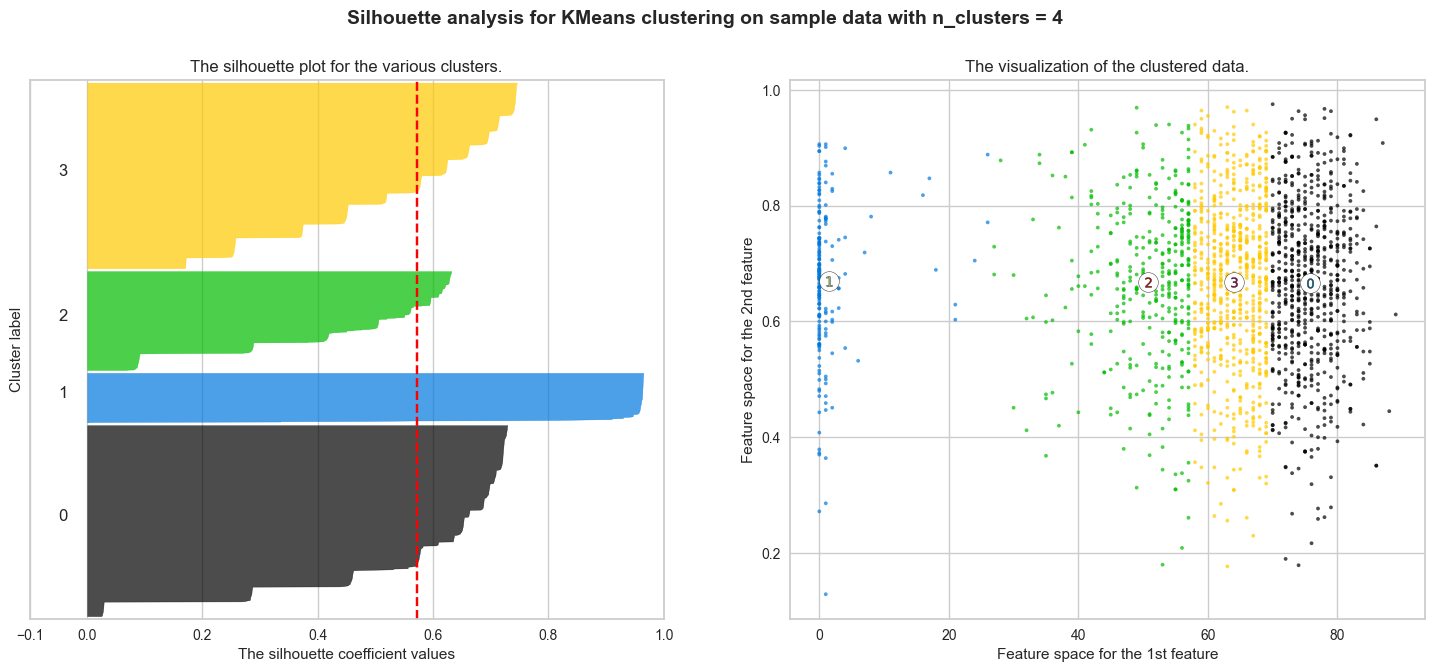

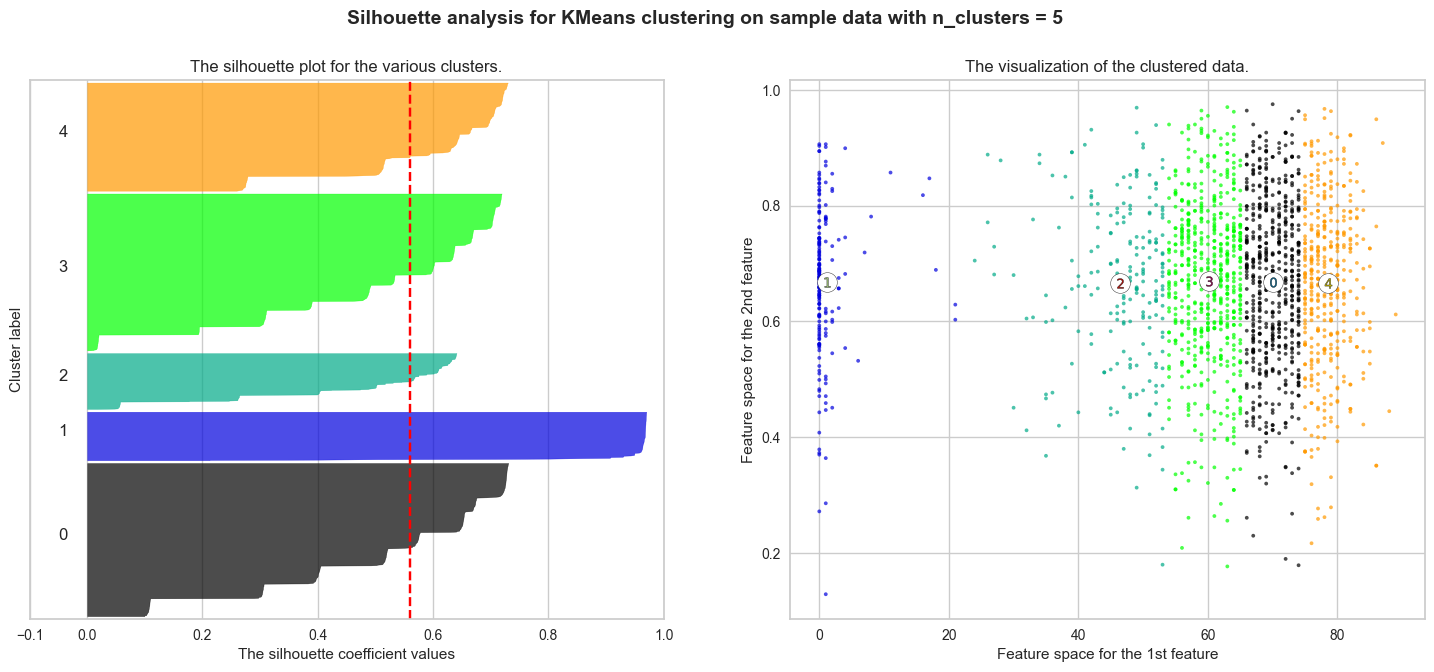

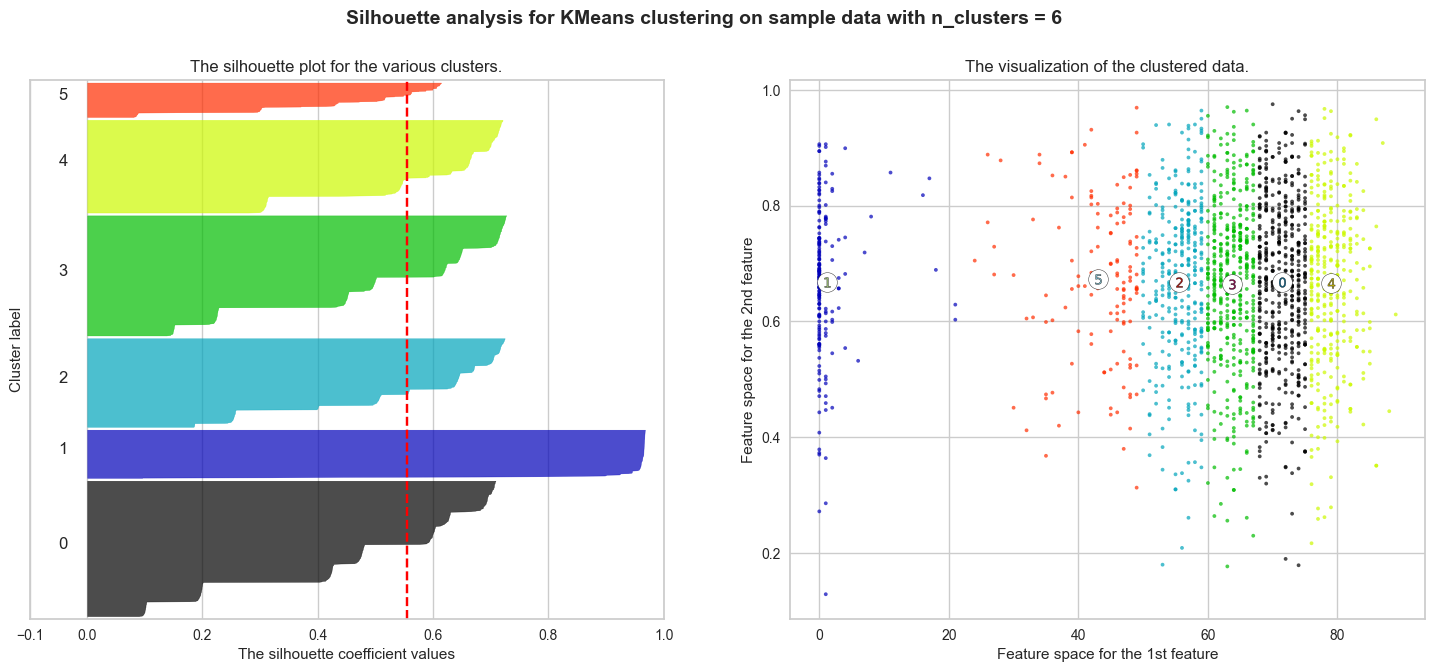

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [19]:
def graphNumericDistribution(data, title, xlabel, ylabel):
  mean = round(data.mean(), 2)
  median = round(data.median(), 2)
  mode = round(data.mode(), 2)
  max_value = round(data.max(), 2)
  min_value = round(data.min(), 2)
  plt.figure()
  sns.histplot(data, kde=True)
  # sns.barplot(data)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.axvline(mean, color='r', linestyle='--', label='Mean')
  plt.axvline(median, color='g', linestyle='--', label='Median')
  # plt.ylim(0, data.max())
  plt.legend()

  plt.text(0.98, 0.82, 'Mean: '+str(mean), transform=plt.gca().transAxes, ha='right', va='top')
  plt.text(0.98, 0.76, 'Median: '+str(median), transform=plt.gca().transAxes, ha='right', va='top')
  plt.text(0.98, 0.70, 'Mode: '+str(mode[0]), transform=plt.gca().transAxes, ha='right', va='top')
  plt.text(0.98, 0.64, 'Max: '+str(max_value), transform=plt.gca().transAxes, ha='right', va='top')
  plt.text(0.98, 0.58, 'Min: '+str(min_value), transform=plt.gca().transAxes, ha='right', va='top')

count      2000.000000
mean     228748.124500
std       39136.569008
min      113000.000000
25%      203580.000000
50%      223279.500000
75%      248133.000000
max      484146.000000
Name: duration_ms, dtype: float64


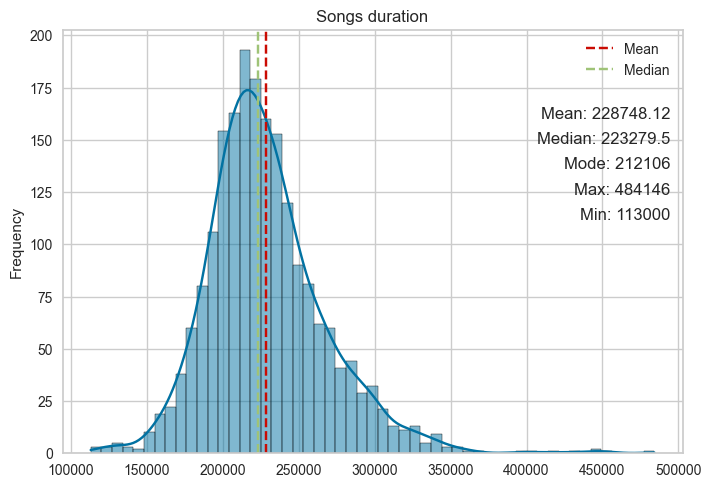

In [20]:
songsDuration = songs_df['duration_ms'][~np.isnan(songs_df['duration_ms'])]
graphNumericDistribution(songsDuration, 'Songs duration', '', 'Frequency')
print(songsDuration.describe())

count    2000.00000
mean     2009.49400
std         5.85996
min      1998.00000
25%      2004.00000
50%      2010.00000
75%      2015.00000
max      2020.00000
Name: year, dtype: float64


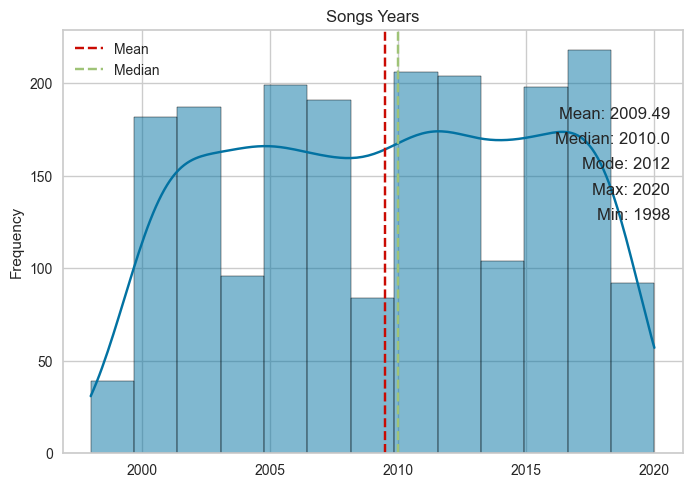

In [21]:
songsYear = songs_df['year'][~np.isnan(songs_df['year'])]
graphNumericDistribution(songsYear, 'Songs Years', '', 'Frequency')
print(songsYear.describe())

count    2000.000000
mean       59.872500
std        21.335577
min         0.000000
25%        56.000000
50%        65.500000
75%        73.000000
max        89.000000
Name: popularity, dtype: float64


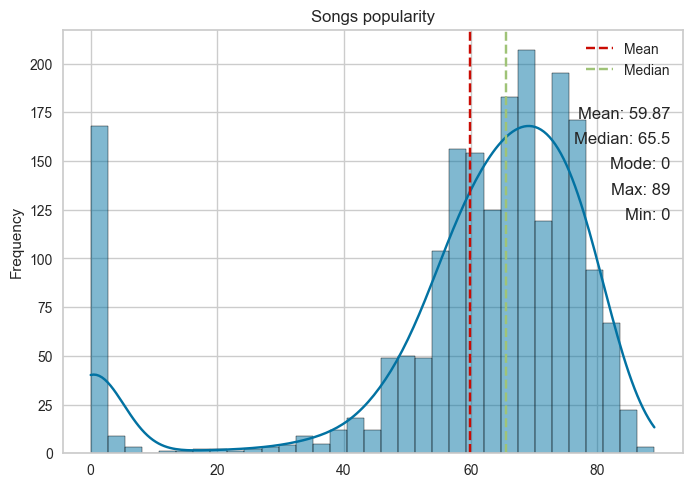

In [22]:
songsPopularity = songs_df['popularity'][~np.isnan(songs_df['popularity'])]
graphNumericDistribution(songsPopularity, 'Songs popularity', '', 'Frequency')
print(songsPopularity.describe())

count    2000.000000
mean        0.667438
std         0.140416
min         0.129000
25%         0.581000
50%         0.676000
75%         0.764000
max         0.975000
Name: danceability, dtype: float64


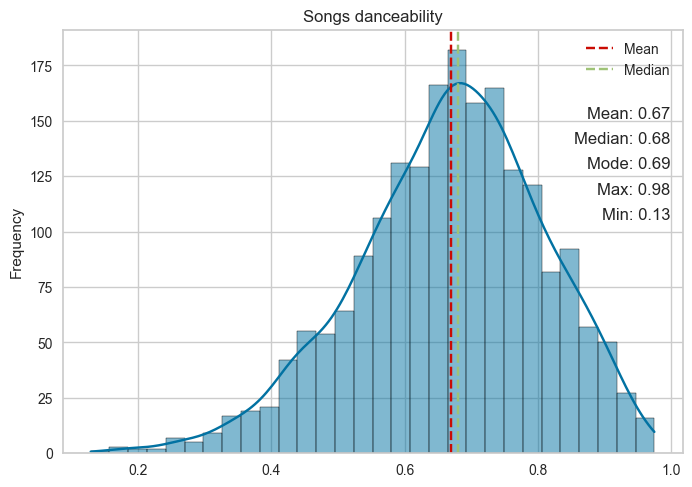

In [23]:
songsdanceability = songs_df['danceability'][~np.isnan(songs_df['danceability'])]
graphNumericDistribution(songsdanceability, 'Songs danceability', '', 'Frequency')
print(songsdanceability.describe())

count    2000.000000
mean        0.720366
std         0.152745
min         0.054900
25%         0.622000
50%         0.736000
75%         0.839000
max         0.999000
Name: energy, dtype: float64


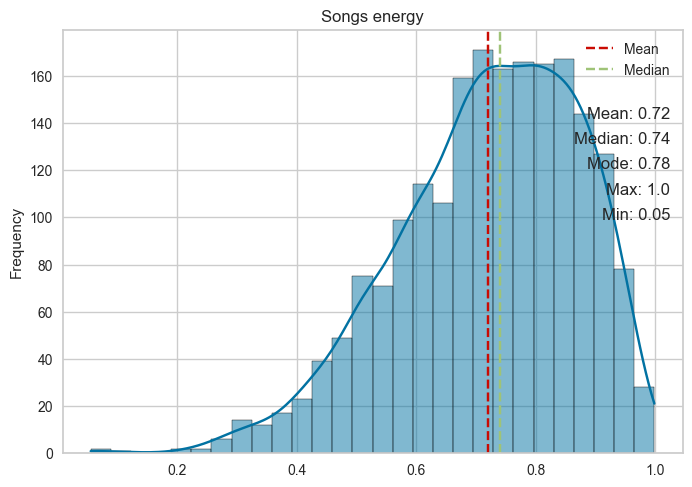

In [24]:
songsEnergy = songs_df['energy'][~np.isnan(songs_df['energy'])]
graphNumericDistribution(songsEnergy, 'Songs energy', '', 'Frequency')
print(songsEnergy.describe())

count    2000.000000
mean        5.378000
std         3.615059
min         0.000000
25%         2.000000
50%         6.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64


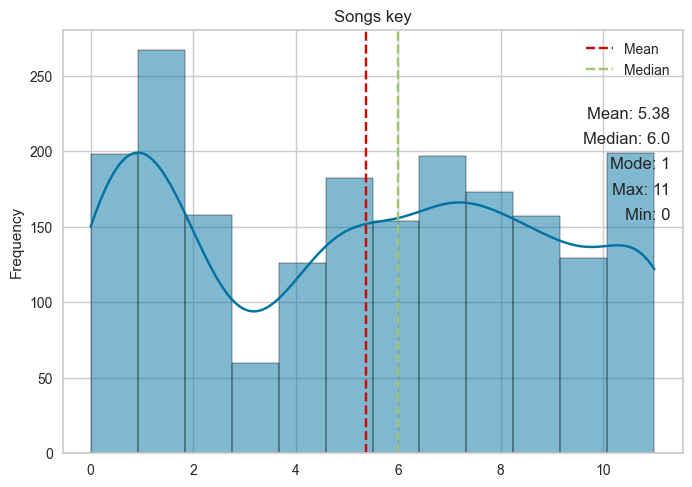

In [25]:
songskey = songs_df['key'][~np.isnan(songs_df['key'])]
graphNumericDistribution(songskey, 'Songs key', '', 'Frequency')
print(songskey.describe())

count    2000.000000
mean       -5.512434
std         1.933482
min       -20.514000
25%        -6.490250
50%        -5.285000
75%        -4.167750
max        -0.276000
Name: loudness, dtype: float64


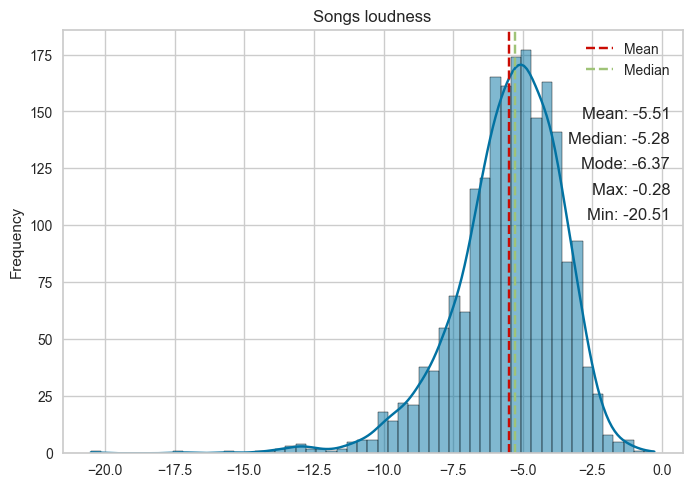

In [26]:
songsloudness = songs_df['loudness'][~np.isnan(songs_df['loudness'])]
graphNumericDistribution(songsloudness, 'Songs loudness', '', 'Frequency')
print(songsloudness.describe())

count    2000.000000
mean        0.103568
std         0.096159
min         0.023200
25%         0.039600
50%         0.059850
75%         0.129000
max         0.576000
Name: speechiness, dtype: float64


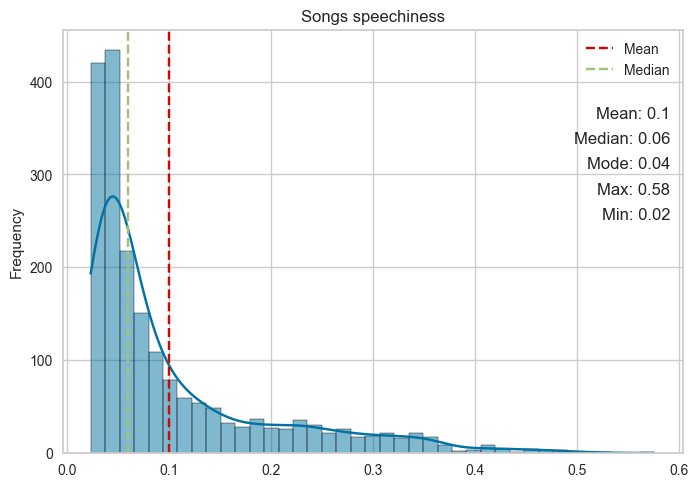

In [27]:
songsSpeechiness = songs_df['speechiness'][~np.isnan(songs_df['speechiness'])]
graphNumericDistribution(songsSpeechiness, 'Songs speechiness', '', 'Frequency')
print(songsSpeechiness.describe())

count    2000.000000
mean        0.128955
std         0.173346
min         0.000019
25%         0.014000
50%         0.055700
75%         0.176250
max         0.976000
Name: acousticness, dtype: float64


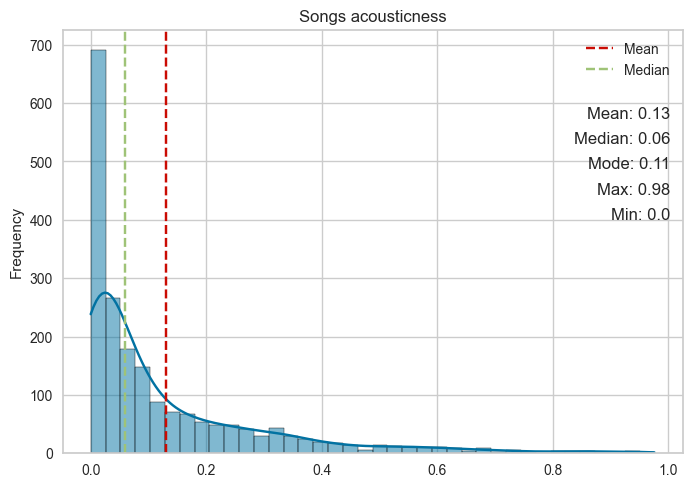

In [28]:
songsacousticness = songs_df['acousticness'][~np.isnan(songs_df['acousticness'])]
graphNumericDistribution(songsacousticness, 'Songs acousticness', '', 'Frequency')
print(songsacousticness.describe())

count    2000.000000
mean        0.181216
std         0.140669
min         0.021500
25%         0.088100
50%         0.124000
75%         0.241000
max         0.853000
Name: liveness, dtype: float64


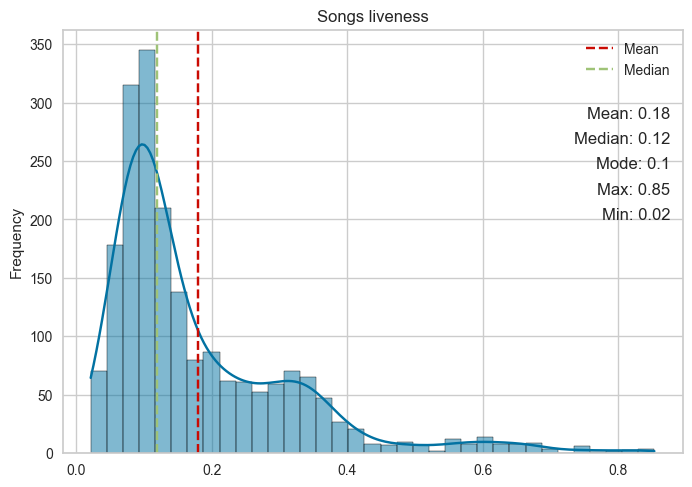

In [29]:
songsliveness = songs_df['liveness'][~np.isnan(songs_df['liveness'])]
graphNumericDistribution(songsliveness, 'Songs liveness', '', 'Frequency')
print(songsliveness.describe())

count    2000.000000
mean        0.551690
std         0.220864
min         0.038100
25%         0.386750
50%         0.557500
75%         0.730000
max         0.973000
Name: valence, dtype: float64


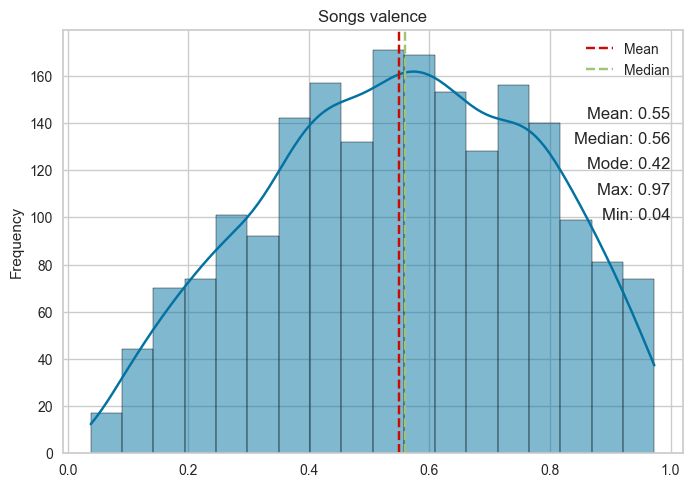

In [30]:
songsvalence = songs_df['valence'][~np.isnan(songs_df['valence'])]
graphNumericDistribution(songsvalence, 'Songs valence', '', 'Frequency')
print(songsvalence.describe())

count    2000.000000
mean      120.122558
std        26.967112
min        60.019000
25%        98.985750
50%       120.021500
75%       134.265500
max       210.851000
Name: tempo, dtype: float64


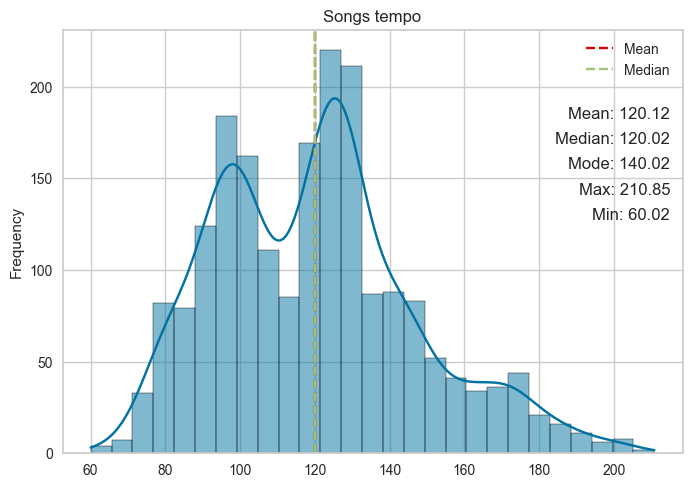

In [31]:
songstempo = songs_df['tempo'][~np.isnan(songs_df['tempo'])]
graphNumericDistribution(songstempo, 'Songs tempo', '', 'Frequency')
print(songstempo.describe())

# Variables Cualitativas

In [32]:
frequency_table = songs_df['artist'].value_counts()

print(frequency_table)

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: count, Length: 835, dtype: int64


In [33]:
frequency_table = songs_df['song'].value_counts()

print(frequency_table)

song
Sorry                   5
Don't                   3
Closer                  3
Breathe                 3
It's My Life            3
                       ..
Dani California         1
What Hurts The Most     1
You Know I'm No Good    1
Ms. New Booty           1
Circles                 1
Name: count, Length: 1879, dtype: int64


In [34]:
frequency_table = songs_df['explicit'].value_counts()

print(frequency_table)

explicit
False    1449
True      551
Name: count, dtype: int64


In [35]:
frequency_table = songs_df['mode'].value_counts()

print(frequency_table)

mode
1    1107
0     893
Name: count, dtype: int64


In [36]:
frequency_table = songs_df['genre'].value_counts()

print(frequency_table)

genre
pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip 

¿Cómo afecta el nivel de energía de una canción a su sonoridad? ¿Es posible que canciones con mayor energía sean sistemáticamente más sonoras debido a la producción musical?

                            OLS Regression Results                            
Dep. Variable:               loudness   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1470.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):          1.72e-241
Time:                        14:40:55   Log-Likelihood:                -3604.7
No. Observations:                2000   AIC:                             7213.
Df Residuals:                    1998   BIC:                             7225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4487      0.158    -72.328      0.0

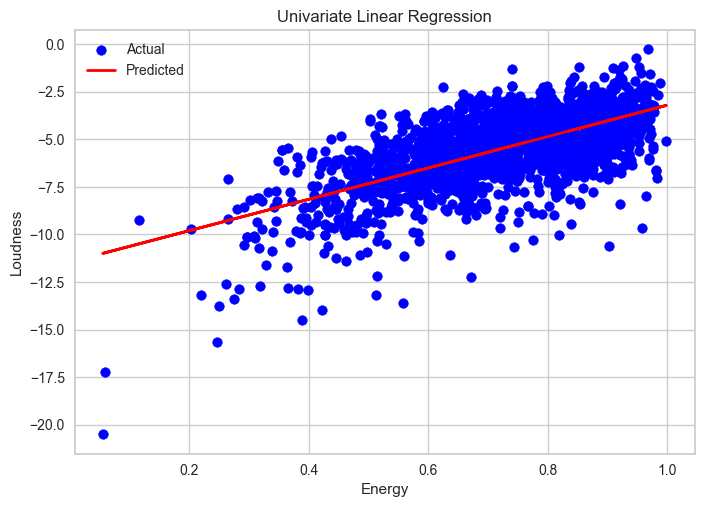

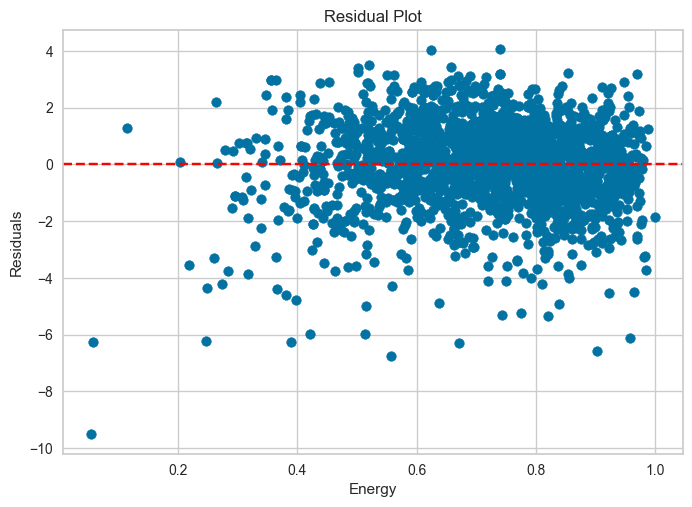

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Asumiendo que df es tu DataFrame y que contiene las columnas 'energy' y 'loudness'

# Variable predictora
X = songs_df['energy']

# Añadir una constante para el término de intercepción
X = sm.add_constant(X)

# Variable objetivo
y = songs_df['loudness']

# Modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

# Hacer predicciones
predictions = model.predict(X)

# Gráfico de dispersión y línea de regresión
plt.scatter(songs_df['energy'], y, color='blue', label='Actual')
plt.plot(songs_df['energy'], predictions, color='red', linewidth=2, label='Predicted')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Univariate Linear Regression')
plt.legend()
plt.show()

# Gráfico de residuos
residuals = y - predictions
plt.scatter(songs_df['energy'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Energy')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Dado que la acousticness tiene una correlación negativa con la energía, ¿podría esto indicar que las canciones acústicas tienden a ser más tranquilas y suaves?

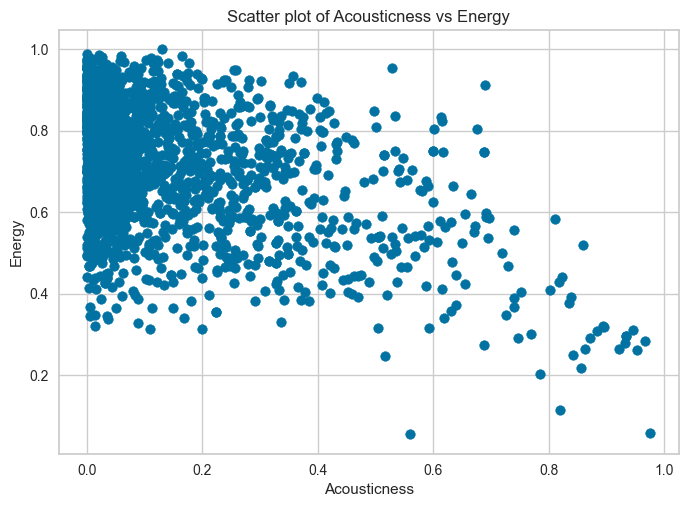

In [41]:
import matplotlib.pyplot as plt

plt.scatter(songs_df['acousticness'], songs_df['energy'])
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Scatter plot of Acousticness vs Energy')
plt.show()